# Plot simulation data

In [1]:
%matplotlib qt

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import griddata
import matplotlib.tri as tri

[-600.         -479.44141222 -436.30047371 -408.17212099 -386.88562223
 -369.57281183 -354.87538278 -342.03796847 -330.59529081 -320.23957386
 -310.756198   -301.98928777 -293.82190703 -286.16398488 -278.94460429
 -272.1068842  -265.60447169 -259.3990705  -253.45865807 -247.75617229
 -242.26852646 -236.97585846 -231.86095007 -226.90877202 -222.1061234
 -217.44134277 -212.90407444 -208.48507771 -204.17606991 -199.96959627
 -195.85892127 -191.83793728 -187.90108744 -184.04329996 -180.25993209
 -176.54672186 -172.89974659 -169.31538681 -165.79029489 -162.32136771
 -158.90572254 -155.54067602 -152.22372537 -148.95253199 -145.72490667
 -142.53879658 -139.39227357 -136.28352368 -133.21083778 -130.17260309
 -127.16729557 -124.19347301 -121.24976877 -118.33488615 -115.44759317
 -112.58671791 -109.7511442  -106.93980769 -104.15169222 -101.38582657
  -98.64128137  -95.91716634  -93.21262767  -90.52684564  -87.85903242
  -85.20843005  -82.57430847  -79.95596381  -77.35271675  -74.76391093
  -72.1

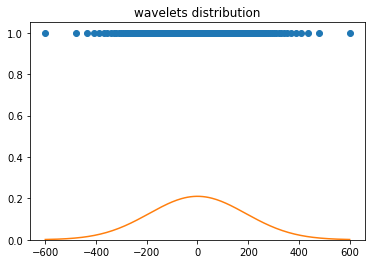

In [65]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

dist = stats.norm(loc=600, scale=190)
dist_2 = stats.norm(loc=600, scale=100)
bounds = dist.cdf([0, 1200])
bounds_2 = dist_2.cdf([0, 1200])
# bounds = np.array([0., 1.])
# print(bounds)
pp = np.linspace(*bounds, num=200)
pp_2 = np.linspace(*bounds_2, num=200)
vals = dist.ppf(pp)
vals_2 = dist_2.ppf(pp_2)
# vals = dist.pdf(pp)
print(vals - 600)

plt.title("wavelets distribution")
plt.plot(vals - 600, [1]*vals.size, 'o')
xs = np.linspace(0, 1200, 200)
plt.plot(xs - 600, 100*dist.pdf(xs))
plt.ylim(ymin=0)
plt.show()

### Load data

In [5]:
data_folder="../../build/data/"
particleid="_0"
pos_x, pos_y = np.loadtxt(data_folder + 'wavefronts'+particleid+'.csv', delimiter=',', unpack=True)
traj_x, traj_y = np.loadtxt(data_folder + 'trajectory'+particleid+'.csv', delimiter=',', unpack=True)
m_pos_x, m_pos_y = np.loadtxt(data_folder + 'comoving_mesh_pos.csv', delimiter=',', unpack=True)
vfld, afld, tf = np.loadtxt(data_folder + 'field'+particleid+'.csv', delimiter=',', unpack=True)
atil, xtil ,tot= np.loadtxt(data_folder +'comoving_mesh_rad_ang.csv', delimiter=',', unpack=True)
vel_f, acc_f, tot_f = np.loadtxt(data_folder + 'comoving_mesh_field.csv', delimiter=',', unpack=True)
#a, x, tot = np.loadtxt('fields.csv', delimiter=',', unpack=True)

xmin = m_pos_x.min(); xmax = m_pos_x.max()
ymin = m_pos_y.min(); ymax = m_pos_y.max()

### Plot wavefronts

In [6]:
# 
ndir =200
nwavefront=3000
plot_every = 5
wave_x = pos_x.reshape([nwavefront,ndir]).transpose()
wave_y = pos_y.reshape([nwavefront,ndir]).transpose()
#lastwave_x=pos_x[16500:17000]
#lastwave_y=pos_y[16500:17000]

fig, ax= plt.subplots()

#ax.scatter(pos_x,pos_y, s=1, facecolor='lightseagreen', label="wavefronts")
#ax.scatter(lastwave_x,lastwave_y, s=1, facecolor='darkorange', label="last_time_step")

ax.plot(wave_x[:, ::plot_every],wave_y[:, ::plot_every],".:")
#ax.scatter(traj_x,traj_y, s=2, marker="+", facecolor='brown', label="trajectory")
# position centered at the time of emission
ax.scatter((traj_x+np.roll(traj_x,1))[1:]/2.0, (traj_y+np.roll(traj_y,1))[1:]/2.0, s=20, marker="+", facecolor='brown', label="trajectory")

plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)
plt.xlabel('x')
plt.ylabel('y')
plt.title('traj and wavefronts')
l = plt.legend(loc='upper right')
ax.grid(True)
plt.show()
plt.savefig('csr_wavefronts.png')


In [7]:
print(traj_x[-1],traj_y[-1])

0.294037916583 0.955809059105


### Plot mesh

In [8]:
firstwave_x = pos_x[:200]
firstwave_y = pos_y[:200]

fig, ax= plt.subplots()
ax.scatter(m_pos_x,m_pos_y, s=18, facecolor='orangered', label="Moving mesh")
ax.scatter(pos_x,pos_y, s=4, facecolor='teal', label="Wavefronts")
#ax.scatter(traj_x,traj_y, s=15, facecolor='black', label="Tracjectory")
ax.scatter((traj_x+np.roll(traj_x,1))[1:]/2.0, (traj_y+np.roll(traj_y,1))[1:]/2.0, s=20, marker="+", facecolor='brown', label="trajectory")
#ax.scatter(firstwave_x,firstwave_y, s=60, facecolor='orangered', label="First_time_step")
#ax.tick_params(labelsize=30)

plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)
#plt.axis('equal')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Co-moving mesh with the wavefronts',fontsize=25)
l = plt.legend(loc='upper right')
ax.grid(True)
plt.legend(loc='upper right', prop={'size': 20})
plt.show()
plt.savefig('csr_mesh.png')

### Plot field

In [9]:
gamma = 10
tf_n=tf/(gamma**4.0)
vf_n=vfld/(gamma**4.0)
af_n=afld/(gamma**4.0)
f_n = tf_n

fig, ax= plt.subplots()
#fig = plt.figure()
#ax = fig.add_subplot(111, projection='3d')
#ax.scatter(pos_x, pos_y, tf_n,  marker='o')

cm = plt.cm.get_cmap('coolwarm')
#sc=ax.scatter(pos_x,pos_y,c=tf_n, marker='.',s=3,cmap=cm )

sc=ax.scatter(pos_x,pos_y,c=f_n,vmin=-6,vmax=6, marker='o',s=40,cmap=cm )
#sc=ax.scatter(pos_x,pos_y,c=f_n, marker='o',s=40,cmap=cm )
plt.colorbar(sc)           
#ax.set_facecolor('grey')
plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)
plt.xlabel('x')
plt.ylabel('y')
plt.rc('xtick',labelsize=25)
plt.rc('ytick',labelsize=25)
ax.tick_params(labelsize=30)
plt.title('Normalized total field',fontsize=25)
#plt.legend(loc='upper right', prop={'size': 25})
ax.grid(True)
plt.show()
plt.savefig('csr_circular_field.png')

### Plot interpolated field

In [10]:
gamma = 10
nr = 101; ntheta=101
tf_n=tot/(gamma**4.0)
vf_n=vel_f/(gamma**4.0)
af_n=acc_f/(gamma**4.0)
f_n = tf_n/100
f_n_arr = f_n.reshape([ntheta,nr]).transpose()
print(f_n.min(),f_n.max())

fig, ax= plt.subplots(1)

cm = plt.cm.get_cmap('coolwarm')
#coolwarm
#sc = ax.scatter( xtil, atil, c=f_n, vmin=-5, vmax=5, marker='.', s=5, cmap=cm ) 
#sc = ax.imshow( f_n_arr, vmin=-6, vmax=6, cmap=cm, aspect="auto",origin="upper" )
#sc = ax.imshow( f_n_arr, cmap=cm, aspect="auto" )
sc = ax.scatter(m_pos_x,m_pos_y, c=f_n, vmin=-6, vmax=6, marker='.', s=10, cmap=cm )
plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)
plt.colorbar(sc)
ax.set_facecolor('grey' )
plt.xlabel('x')
plt.ylabel('y')
plt.title('field on the mesh ')
#l = plt.legend(loc='upper right')
ax.grid(True)
plt.show()
plt.savefig('csr_mesh_field_rad_ang.png')

-0.04 0.0


### Benchmark

In [12]:
fig=plt.figure(1)
gamma=10
tf_n=tot/-gamma**4
a=-a/180*np.pi
x=x
cm = plt.cm.get_cmap('coolwarm')
#sc = ax.scatter(x, a, c=tf_n, marker='o', s=5, cmap=cm ) 
#sc = plt.scatter(a, x, c=tf_n, vmin=-10, vmax=10, marker='o', s=1, cmap=cm )
sc = plt.scatter(a, x, c=tf_n, marker='o', s=1, cmap=cm )
#ax = fig.add_subplot(111)
plt.colorbar(sc)
#ax.set_facecolor('grey' )
xx=0.005
aa=0.0005
plt.ylim([-xx,xx]) 
plt.xlim([-aa,aa])
plt.ylabel('x')
plt.xlabel('a')
#plt.title('field on the wavefronts')
#l = plt.legend(loc='upper right')
plt.grid(True)
#plt.show()
#plt.savefig('csr_mesh_field.png')

# define grid.
#pos =np.array([x, a]).T
#grid_x, grid_a = np.mgrid[-0.05:0.05:500j, -0.005:0.005:500j]
#grid_z0 = griddata( pos, tf_n, (grid_x, grid_a), method='nearest')

plt.figure(2)
# define grid.                                                                                                                                                                      
#xi = np.linspace(-0.01,0.01,100)
#ai = np.linspace(-0.01,0.01,100)
xi = np.linspace(-0.005,0.005,100)
ai = np.linspace(-0.0005,0.0005,100)
pos =np.array([a, x]).T
# grid the data.
zi = griddata((a, x), tf_n, (ai[None,:], xi[:,None]), method='linear')
# contour the gridded data, plotting dots at the randomly spaced data points.
levels = np.linspace(-10.0, 10.0, 11)
CS = plt.contour(ai,xi,zi,levels=levels,linewidths=0.7,colors='k')
CS = plt.contourf(ai,xi,zi,levels=levels, cmap=plt.cm.jet)
plt.colorbar() # draw colorbar
# plot data points.
#plt.scatter(x,a,marker='o',c='b',s=1)
plt.ylim(-xx,xx)
plt.xlim(-aa,aa)
#plt.title('griddata test (%d points)' % npts)
plt.show()

NameError: name 'a' is not defined